In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gco import pygco
import cv2

/Users/yiming/Desktop/find/EE5731/Assignment2/venv/lib/python3.11/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


In [2]:
def color_distance(c1, c2):
    return (abs(c1[0]-c2[0]) + abs(c1[1]-c2[1]) + abs(c1[2]-c2[2])) / 3

In [5]:
def perform_graph_cuts(src_img, src_color, sink_color, m_lambda):
    H, W, _ = src_img.shape

    # Convert image to RGB
    src_img_rgb = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

    # Initialize denoiseImg as a reference to the original image
    denoise_img = src_img.copy()

    # Initialize unary and pairwise potentials
    unary = np.zeros([H, W, 2])
    pairwise = (1 - np.eye(2))

    # Compute unary potentials
    for y in range(H):
        for x in range(W):
            c = src_img_rgb[y][x]
            src_label = color_distance(c, src_color) / 255
            sink_label = color_distance(c, sink_color) / 255
            unary[y][x] = [src_label, sink_label]

    # Perform graph cuts
    labels = pygco.cut_grid_graph_simple(unary, pairwise * m_lambda, n_iter=-1)
    labels = labels.reshape(H, W)

    # Update denoiseImg based on labels
    for y in range(H):
        for x in range(W):
            if labels[y][x] == 1:
                denoise_img[y][x] = sink_color
            if labels[y][x] == 0:
                denoise_img[y][x] = src_color

    return denoise_img

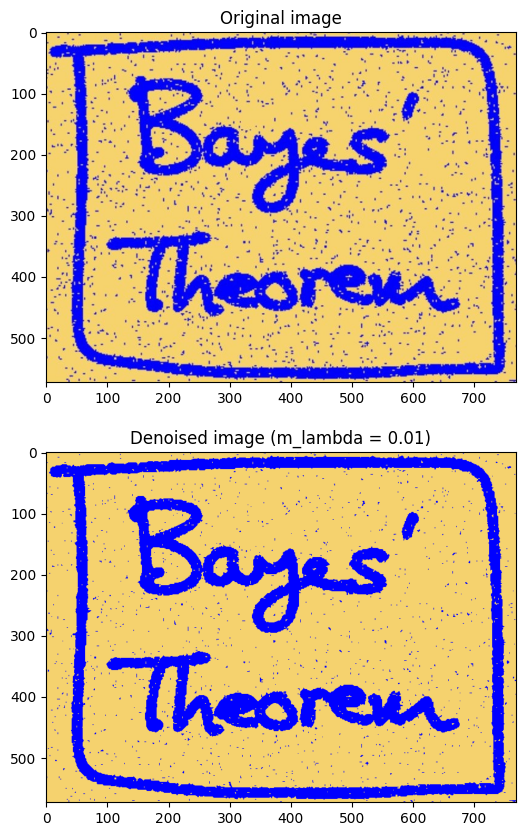

In [7]:
src_img = cv2.imread('noise.jpeg')

# Define foreground and background colors
foreground_color = np.array([0, 0, 255])  # Blue for foreground
background_color = np.array([245, 210, 110])  # Yellow for background

denoised_img = perform_graph_cuts(src_img, foreground_color, background_color,0.01)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title('Original image')
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))
plt.subplot(212)
plt.title('Denoised image (m_lambda = 0.01)')
plt.imshow(denoised_img)
plt.show()

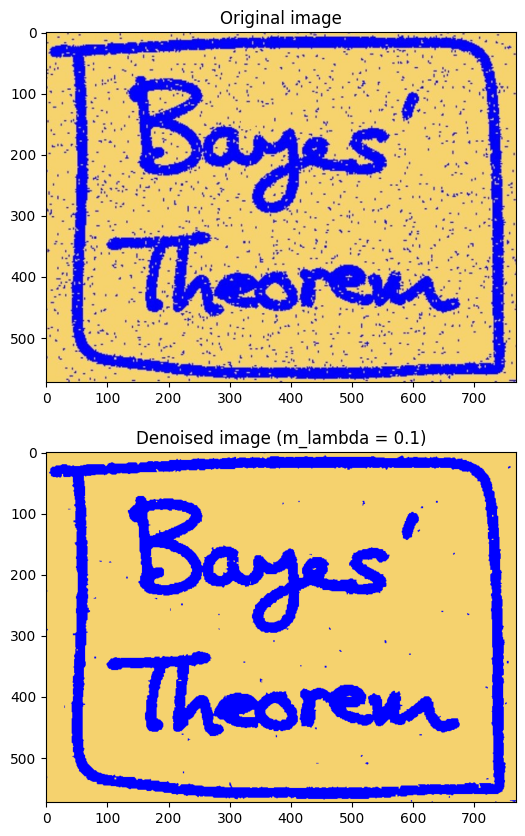

In [8]:
denoised_img = perform_graph_cuts(src_img, foreground_color, background_color,0.1)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title('Original image')
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))
plt.subplot(212)
plt.title('Denoised image (m_lambda = 0.1)')
plt.imshow(denoised_img)
plt.show()

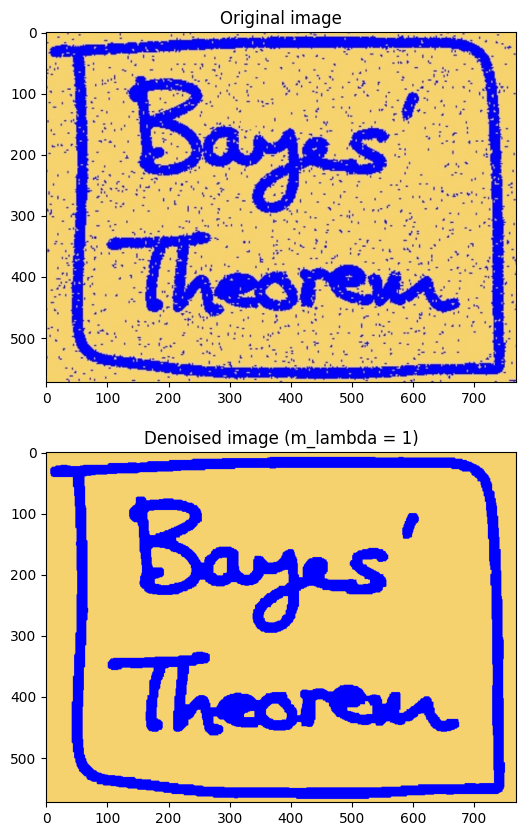

In [9]:
denoised_img = perform_graph_cuts(src_img, foreground_color, background_color,1)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title('Original image')
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))
plt.subplot(212)
plt.title('Denoised image (m_lambda = 1)')
plt.imshow(denoised_img)
plt.show()

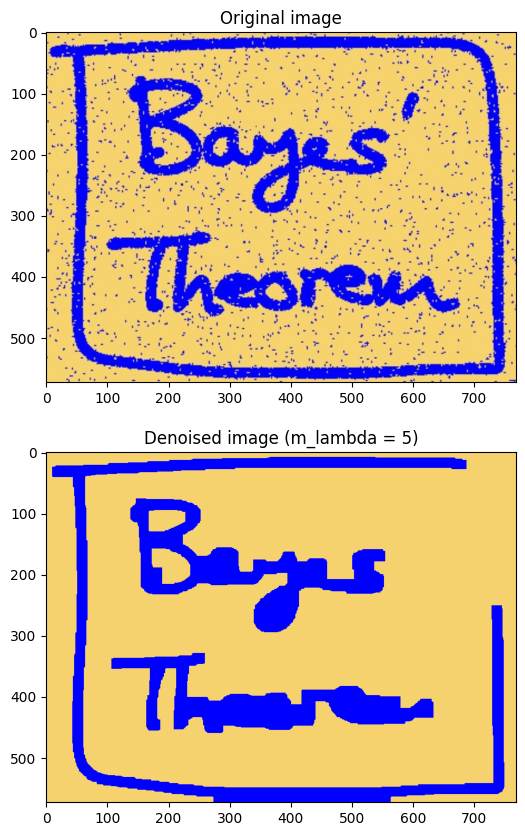

In [10]:
denoised_img = perform_graph_cuts(src_img, foreground_color, background_color,5)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title('Original image')
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))
plt.subplot(212)
plt.title('Denoised image (m_lambda = 5)')
plt.imshow(denoised_img)
plt.show()

The best result appears when lambda equals to 1